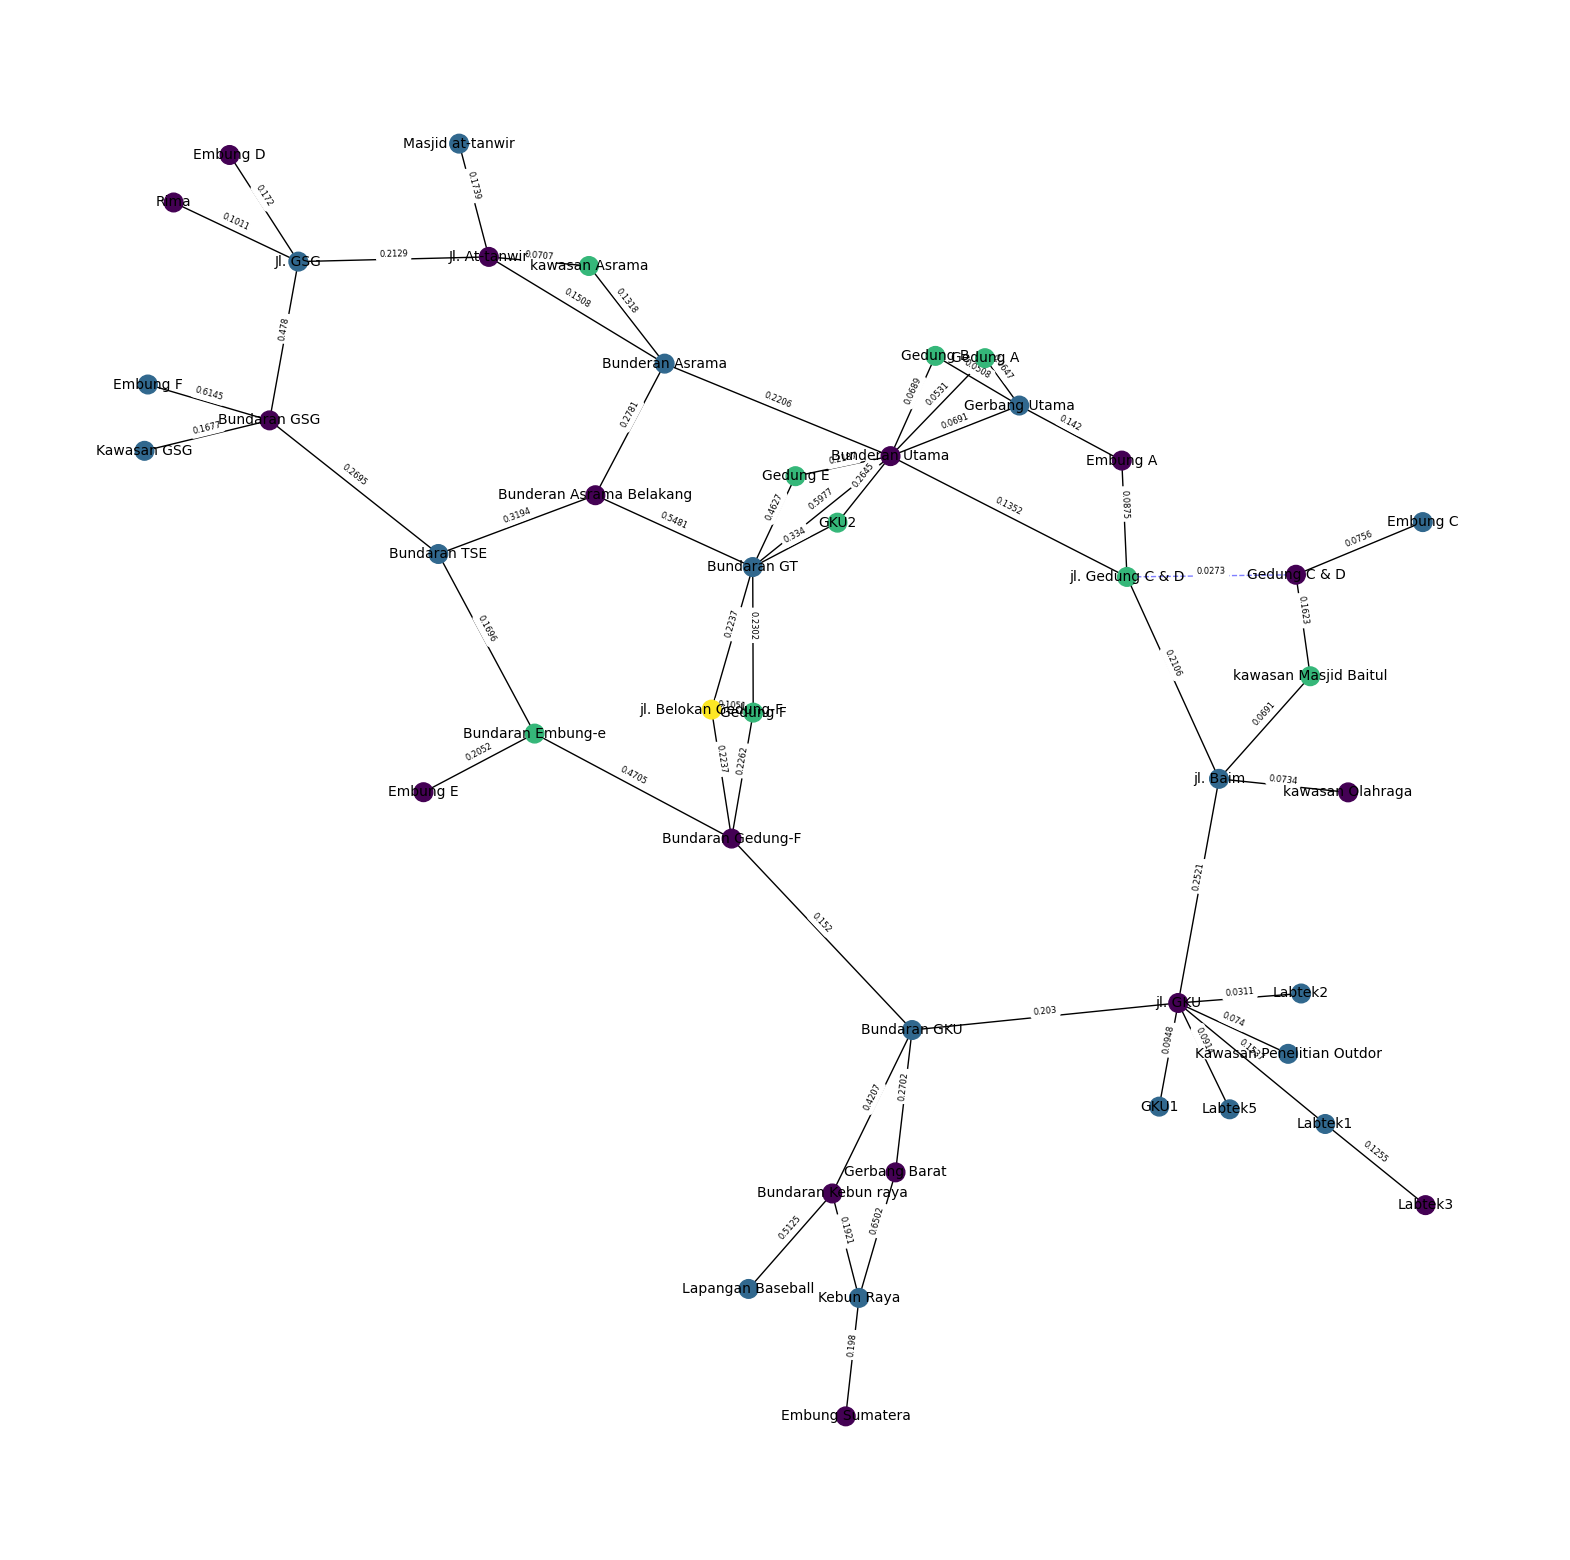

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import math
import pandas as pd


def calculate_distance_between_lat_lon(G, node1, node2):
    # get the lat lon of the nodes
    lat1 = G.nodes[node1]["lat"]
    lon1 = G.nodes[node1]["lon"]
    lat2 = G.nodes[node2]["lat"]
    lon2 = G.nodes[node2]["lon"]
    # calculate the distance
    distance = distance_lat_lon(lat1, lon1, lat2, lon2)
    return distance


def distance_lat_lon(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km with the haversine formula

    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)

    R = 6373.0
    # convert to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    # change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # haversine formula
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    # c is the central angle
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    # distance is the radius times the central angle
    distance = R * c
    # get .f2
    distance = float("{:.4f}".format(distance))

    return distance


# create graph object that contain vertex and value lat lon
G = nx.Graph()

# read the data from csv file

df = pd.read_excel("../data/datavertex.xlsx")
# get lat lon from data cordinate
df["lat"] = df["cordinate"].apply(lambda x: x.split(",")[0])
df["lon"] = df["cordinate"].apply(lambda x: x.split(",")[1])
# # add node to graph
for i in range(len(df)):
    G.add_node(df["node"][i], lat=df["lat"][i], lon=df["lon"][i])

# read the data from csv file
df = pd.read_excel("../data/edges.xlsx")
# add edge to graph
for i in range(len(df)):
    G.add_edge(
        df["vertek"][i],
        df["to"][i],
        weight=calculate_distance_between_lat_lon(G, df["vertek"][i], df["to"][i]),
    )


# visualize the graph
# make visualization bigger

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.03]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.03]

plt.figure(figsize=(20, 20))
# make visualization bigger, and change the layout algorithm to neato (for more info: https://graphviz.org/doc/info/attrs.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)
# draw edges
# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif",font_color="black")
# draw edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,verticalalignment="bottom",horizontalalignment="center",font_size=6,font_color="black")


# save the graph as png 
plt.axis("off")
plt.savefig("graph.png")
# show the graph
plt.show()





Jarak terpendek dari Gedung F ke Gedung B adalah 0.8967999999999999 km


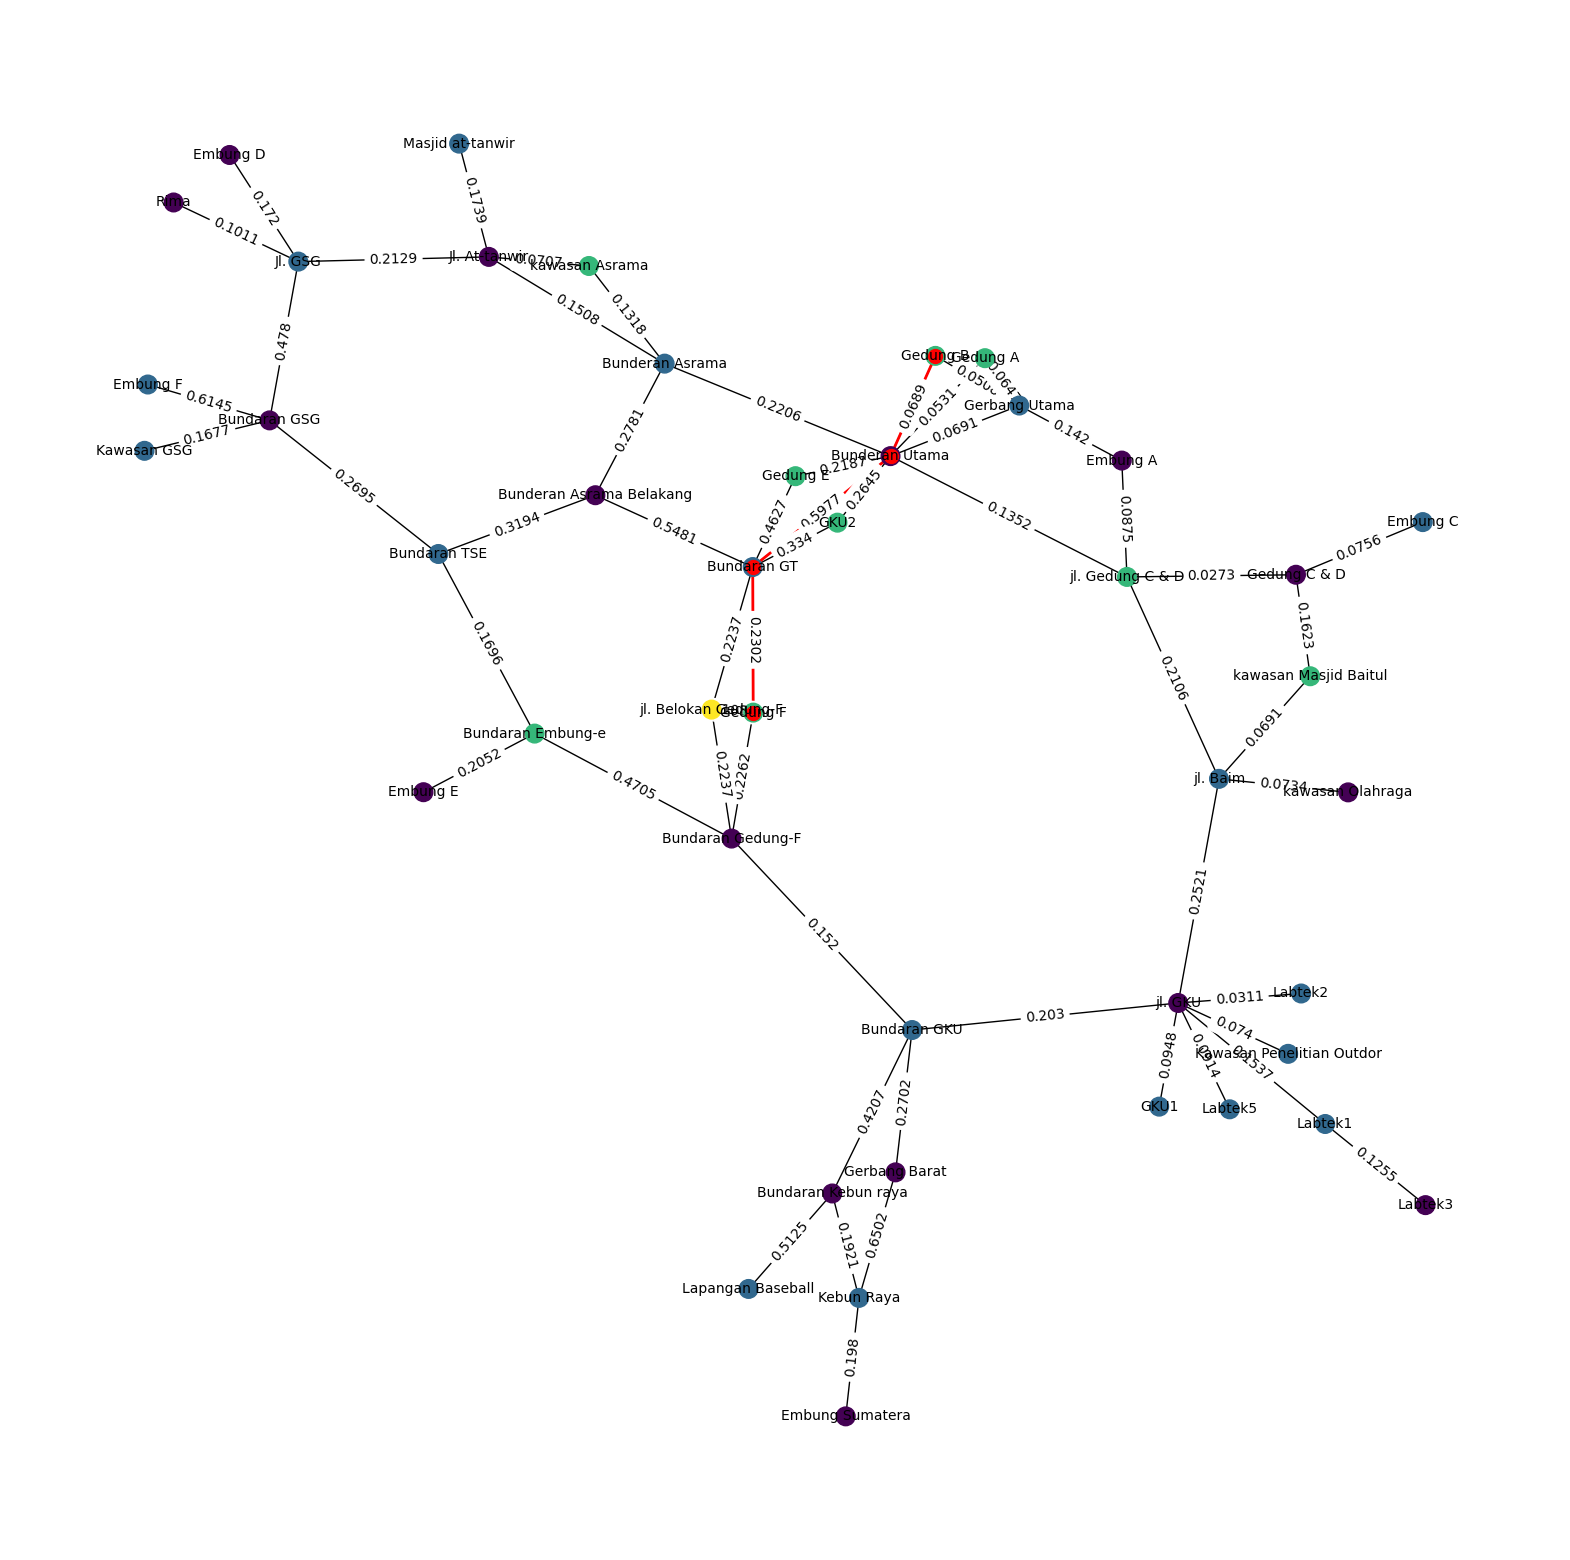

In [9]:
source_node = "Gedung F"
target_node = "Gedung B"

plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)

# labels weight of edges (distance) 
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)



# find the shortest path from Gerbang Utama to Gerbang Barat

path =  nx.dijkstra_path(G, source_node,target_node , weight="weight")
# get weight of the path and sum it
sum_weight = 0
for i in range(len(path) - 1):
    sum_weight += G[path[i]][path[i + 1]]["weight"]
print(f"Jarak terpendek dari {source_node} ke {target_node} adalah {sum_weight} km")


# draw the shortest path from Gerbang Utama to Gerbang Barat with red color
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="r", node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)

# # draw labels
# # show the graph
plt.axis("off")
plt.show()        

## Mencari Jarak Terdekat di ITERA  Implementasi materi graf dengan menggunakan metode Algoritma Dijkstra

Sering kali dalam kehidupan sehari-hari, khususnya dalam lingkungan kampus, kita dihadapkan dengan situasi yang di mana kita perlu menentukan jarak terdekat antara dua lokasi untuk mempersingkat waktu. Misalnya, kita ingin berangkat ke gedung F dari GKU untuk mengikuti mata kuliah selanjutnya yang dimana rentang waktu antar matkul tersebut berdekatan, sehingga mengharuskan kita untuk mencari jalur tercepat untuk sampai ke gedung F tersebut, agar tidak terlambat. Maka dari itu kami mencoba menyelesaikan permasalahan tersebut dengan memanfatkan materi yang kami dapatkan yakni Graf dengan menggunakan metode Algoritma Dijkstra.

Graf adalah sekumpulan objek terstruktur di mana beberapa pasangan objek memiliki hubungan atau keterkaitan tertentu satu sama lain.[1] Seperti kumpulan titik atau simpul yang terhubung oleh garis atau sisi. Misalnya, dari permasalahan sebelumnya dapat kita analogikan gedung F dan GKU merupakan kedua objek (titik) serta dalam konteks masalah ini, hubungannya adalah jalan antara kedua lokasi tersebut (garis).
Dengan Algoritma Dijkstra kita bisa mencari jalan terdekat, karena definisinya sendiri adalah suatu algoritma dengan pendekatan mencari solusi terbaik yang tersedia untuk memilih rute terpendek sesuai dengan bobot terkecil. Dengan kata lain, algoritma ini mencari jarak terpendek dari suatu titik ke titik lainnya. dengan mengambil nilai terkecil dari setiap simpul yang terhubung dengan simpul yang sedang diproses.

Dalam implementasi ini, kami menggunakan bahasa pemrograman Python. Python adalah bahasa pemrograman interpretatif multiguna dengan filosofi perancangan yang berfokus pada tingkat keterbacaan kode.[2] Python diklaim sebagai bahasa yang menggabungkan kapabilitas, kemampuan, dengan sintaksis kode yang sangat jelas, dan dilengkapi dengan fungsionalitas pustaka standar yang besar serta komprehensif. Python juga didukung oleh komunitas yang besar. Bahasa ini mendukung berbagai paradigma pemrograman, termasuk pemrograman terstruktur, berorientasi objek, dan fungsional. Python juga dapat digunakan untuk melakukan berbagai pengembangan perangkat lunak dan dapat berjalan di berbagai platform sistem operasi. Python juga tersedia dalam berbagai jenis dan dapat dijalankan di berbagai sistem operasi seperti Unix, Linux, Windows, dan Mac OS.

## persiapan data vertex dan edge
Data yang kami gunakan adalah data yang kami dapatkan dari googlemaps. Data tersebut berupa titik-titik yang ada di ITERA yang kemudian dijadikan data vertex dari graf yang akan dibuat. Selain itu, data tersebut mengandung titik koorinat dari setiap vertex yang akan digunakan untuk menentukan jarak antar vertex. Selain itu, data tersebut juga mengandung data edge yang merupakan kumpulan vertex yang terhubung dengan vertex lainnya. Data tersebut kemudian kami masukkan ke dalam file .xlsx yang kemudian akan diolah oleh program yang kami buat.

## membuat data vertex dan edge

<!-- buat images denah itera dari google maps -->
![denah itera](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/denahitera.png)

pertama-tama kita membuka googlemaps dan mencari titik-titik yang akan dijadikan vertex. Setelah itu, kita mencari koordinat dari setiap vertex tersebut. kemudian dari vertex tersebut kita mengambil titik koordinat dari googlemaps dan mengubahnya menjadi titik koordinat yang dapat digunakan dalam program.

seperti contoh gambar dibawah ini. kita ingin mengambil titik koordinat dari gedung F. maka kita klik kanan pada gedung F dan klik kanan. setelah itu, akan muncul titik koordinat dari gedung F tersebut. kemudian kita copy titik koordinat tersebut dan masukkan ke dalam file .xlsx yang telah dibuat.

<!-- gambar denah itera dan titik koordinat -->
![denah itera dan titik koordinat](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/vertexkorniate.png)

terus lakukan langkah yang sama untuk setiap vertex yang akan dijadikan vertex pada graf. setelah itu, masukkan data vertex tersebut ke dalam file .xlsx yang telah dibuat. seperti contoh gambar dibawah ini.

<!-- gambar data vertex -->
![data vertex](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/datavertex.png)

setelah itu, kita mencari data edge yang merupakan kumpulan vertex yang terhubung dengan vertex lainnya. seperti contoh gambar dibawah ini. Kita ingin mencari vertex-vertex apa saja yang terhubung dengan vertex gedung F. maka kita klik kanan pada gedung F dan klik kanan. setelah itu, akan muncul vertex-vertex yang terhubung dengan gedung F tersebut. kemudian kita buat data edge yang berisi vertex-vertex yang terhubung dengan gedung F tersebut. seperti contoh gambar dibawah ini.

<!-- gambar data edge -->
![data edge](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/edges.png)

terus lakukan langkah yang sama untuk setiap vertex yang akan dijadikan vertex pada graf. setelah itu, masukkan data edge tersebut ke dalam file .xlsx yang telah dibuat. seperti contoh gambar dibawah ini.

<!-- gambar data edge -->
![data edge](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/dataedges.png)

## membuat graf dari data vertex dan edge

setelah data vertex dan edge telah dibuat, selanjutnya kita membuat graf dari data vertex dan edge tersebut. pertama-tama kita mengimport library pandas dan networkx.    
```python
import pandas as pd
import networkx as nx
```
kemudian kita membaca file .xlsx yang telah dibuat.    
```python
dfvertex = pd.read_excel('datavertex.xlsx')
```
setelah itu kita memisahkan data koordinat longitude dan latitude dari data vertex.    
```python
dfvertex["lat"] = dfdfvertex["cordinate"].apply(lambda x: x.split(",")[0])
dfdfvertex["lon"] = dfdfvertex["cordinate"].apply(lambda x: x.split(",")[1])
```
kemudian kita menghapus kolom cordinate dari data vertex.    
```python
dfvertex = dfvertex.drop(columns=['cordinate'])
```

kemudian kita membuat inilisasi graf.    
```python
G = nx.Graph()
```
kemudian kita menambahkan vertex ke dalam graf.    
```python
for index, row in dfvertex.iterrows():
    G.add_node(row['vertex'], lat=row['lat'], lon=row['lon'])
```
kemudian import data edges dan kita membaca file .xlsx yang telah dibuat.    
```python
dfedge = pd.read_excel('dataedge.xlsx')
```
karena kita ingin membuat graf yang tidak berarah dan memiliki bobot, maka kita menambahkan atribut weight pada setiap edge.    
data weight tersebut didapat dari jarak antar vertex yang telah dihitung menggunakan rumus haversine.    
rumus harversine adalah metode yang digunakan untuk menghitung jarak antara dua titik pada permukaan bola yang memiliki jari-jari tertentu (dalam kasus ini adalah jari-jari bumi).    
```python
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
 
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
 
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
 
    return R * c
```

dan membuat fungsi bantuan untuk menghitung jarak antar vertex.    
```python
def calculate_distance_between_lat_lon(G, vertex1, vertex2):
    lat1 = float(G.nodes[vertex1]["lat"])
    lon1 = float(G.nodes[vertex1]["lon"])
    lat2 = float(G.nodes[vertex2]["lat"])
    lon2 = float(G.nodes[vertex2]["lon"])
    return haversine(lat1, lon1, lat2, lon2)
```

kemudian kita menambahkan atribut weight pada setiap edge.    
```python
for i in range(len(df)):
    G.add_edge(
        df["vertek"][i],
        df["to"][i],
        weight=calculate_distance_between_lat_lon(G, df["vertek"][i], df["to"][i]),
    )
```
setelah semua data vertex dan edge telah ditambahkan, maka graf telah selesai dibuat. maka graf dapat ditampilkan dengan menggunakan library networkx. yang akan mewarnai setiap vertex berdasarkan warna yang telah ditentukan. mengunakan greedy coloring. 


```python
# mengkategorikan graph berdasarkan bobot edge 
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.03]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.03]

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)
# draw edges
# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif",font_color="black")
# draw edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,verticalalignment="bottom",horizontalalignment="center",font_size=6,font_color="black")


# save the graph as png 
plt.axis("off")
plt.savefig("graph.png")
# show the graph
plt.show()

```

yang akan menghasilkan gambar graf seperti dibawah ini.
<!-- gambar graf -->
![graf](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/graph.png)

## mencari jarak terdekat antar vertex

setelah graf telah dibuat, selanjutnya kita mencari jarak terdekat antar vertex. misalkan kita ingin mencari jarak terdekat antara vertex gedung F dan vertex gedung A. maka kita menggunakan algoritma dijkstra untuk mencari jarak terdekat antara kedua vertex tersebut.    
```python
# mencari jarak terdekat antara vertex gedung F dan vertex gedung B
print(nx.dijkstra_path(G, "Gedung F", "Gedung B", weight="weight"))
```
yang akan menghasilkan output sebagai berikut.
```python
['Gedung F', 'Bundaran GT', 'Bunderan Utama', 'Gedung B']
```

dari sana kita dapat mengetahui bahwa jarak terdekat antara vertex gedung F dan vertex gedung A adalah Gedung F -> Bundaran GT -> Bunderan Utama -> Gedung B

marilah kita coba untuk mencari jarak terdekat antara vertex gedung F dan vertex gedung B dan jarak tempuhnya. 
   


jika hanya melihat outputnya saja, maka kita tidak dapat mengetahui jarak terdekat antara kedua vertex tersebut. maka dari itu kita mencoba untuk menampilkan graf yang telah dibuat sebelumnya dengan menampilkan jarak terdekat antara kedua vertex tersebut.    
```python
path =  nx.dijkstra_path(G, source_node,target_node , weight="weight")
# get weight of the path and sum it
sum_weight = 0
for i in range(len(path) - 1):
    sum_weight += G[path[i]][path[i + 1]]["weight"]
print(f"Jarak terpendek dari {source_node} ke {target_node} adalah {sum_weight} km")
```
yang akan menghasilkan output sebagai berikut.
```python
jarak terpendek dari Gedung F ke Gedung B adalah 0.8967999999999999 km
```

kemudian kita menampilkan graf yang telah dibuat sebelumnya dengan menampilkan jarak terdekat antara kedua vertex tersebut.    
```python
source_node = "Gedung F"
target_node = "Gedung B"

plt.figure(figsize=(20, 20))

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)

# labels weight of edges (distance) 
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)



# find the shortest path from Gerbang Utama to Gerbang Barat

path =  nx.dijkstra_path(G, source_node,target_node , weight="weight")
# get weight of the path and sum it
sum_weight = 0
for i in range(len(path) - 1):
    sum_weight += G[path[i]][path[i + 1]]["weight"]
print(f"Jarak terpendek dari {source_node} ke {target_node} adalah {sum_weight} km")


# draw the shortest path from Gerbang Utama to Gerbang Barat with red color
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="r", node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)

# # draw labels
# # show the graph
plt.axis("off")
plt.show()        
```
yang akan menghasilkan output sebagai berikut. 
<!-- gambar output -->

![output](https://raw.githubusercontent.com/EgiStr/denah-graph-itera/main/images/jarak%20terpendek%20gedung%20f-b.png)


## kesimpulan
dari hasil yang telah kami dapatkan, kami dapat menyimpulkan bahwa dengan menggunakan materi graf dengan menggunakan metode Algoritma Dijkstra, kami dapat menyelesaikan permasalahan yang kami hadapi yakni mencari jarak terdekat antara dua lokasi di ITERA. dengan menggunakan materi graf dengan menggunakan metode Algoritma Dijkstra, kami dapat menyelesaikan permasalahan tersebut dengan baik.


kalian dapat melihat kode program yang telah kami buat di github kami.
dataset yang kami gunakan juga dapat kalian lihat di github kami.
* https://github.com/EgiStr/denah-graph-itera/blob/main/data/datavertex.xlsx
* https://github.com/EgiStr/denah-graph-itera/blob/main/data/edges.xlsx
```python
import matplotlib.pyplot as plt
import networkx as nx
import math
import pandas as pd


def calculate_distance_between_lat_lon(G, node1, node2):
    # get the lat lon of the nodes
    lat1 = G.nodes[node1]["lat"]
    lon1 = G.nodes[node1]["lon"]
    lat2 = G.nodes[node2]["lat"]
    lon2 = G.nodes[node2]["lon"]
    # calculate the distance
    distance = distance_lat_lon(lat1, lon1, lat2, lon2)
    return distance


def distance_lat_lon(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km with the haversine formula

    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)

    R = 6373.0
    # convert to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    # change in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # haversine formula
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    # c is the central angle
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    # distance is the radius times the central angle
    distance = R * c
    # get .f2
    distance = float("{:.4f}".format(distance))

    return distance


# create graph object that contain vertex and value lat lon
G = nx.Graph()

# read the data from csv file

df = pd.read_excel("../data/datavertex.xlsx")
# get lat lon from data cordinate
df["lat"] = df["cordinate"].apply(lambda x: x.split(",")[0])
df["lon"] = df["cordinate"].apply(lambda x: x.split(",")[1])
# # add node to graph
for i in range(len(df)):
    G.add_node(df["node"][i], lat=df["lat"][i], lon=df["lon"][i])

# read the data from csv file
df = pd.read_excel("../data/edges.xlsx")
# add edge to graph
for i in range(len(df)):
    G.add_edge(
        df["vertek"][i],
        df["to"][i],
        weight=calculate_distance_between_lat_lon(G, df["vertek"][i], df["to"][i]),
    )


# visualize the graph
# make visualization bigger

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.03]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.03]

plt.figure(figsize=(20, 20))
# make visualization bigger, and change the layout algorithm to neato (for more info: https://graphviz.org/doc/info/attrs.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)
# draw edges
# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif",font_color="black")
# draw edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels,verticalalignment="bottom",horizontalalignment="center",font_size=6,font_color="black")


# show the graph
plt.axis("off")
plt.show()




source_node = "Gedung F"
target_node = "Gedung B"


plt.figure(figsize=(20, 20))
# make visualization bigger, and change the layout algorithm to neato (for more info: https://graphviz.org/doc/info/attrs.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) and set the seed to 0 for reproducibility (for more info: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) 

pos = nx.spring_layout(G, seed=0,scale=3, threshold=0.001,iterations=3000, k=0.14, weight=1.)
# draw nodes
color_map = []
# with gredy coloring

gredy_coloring = nx.greedy_color(G, strategy="largest_first")
for node in G:
    color_map.append(gredy_coloring[node])

# draw nodes with color_map
nx.draw_networkx_nodes(G, pos, node_size=180, node_color=color_map)

# labels weight of edges (distance) 
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=1)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=1
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)



# find the shortest path from Gerbang Utama to Gerbang Barat
path = nx.dijkstra_path(G, source=source_node, target=target_node)
print(path)
# get weight of the path and sum it
sum_weight = 0
for i in range(len(path) - 1):
    sum_weight += G[path[i]][path[i + 1]]["weight"]
print(f"Jarak terpendek dari {source_node} ke {target_node} adalah {sum_weight} km")


# draw the shortest path from Gerbang Utama to Gerbang Barat with red color
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="r", node_size=100)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)

# draw labels
# show the graph
plt.axis("off")
plt.show()        
```

## referensi
[1] https://id.wikipedia.org/wiki/Graf_(teori_graf)    
[2] https://id.wikipedia.org/wiki/Python




